In [24]:
#Loading the dataset
import warnings
warnings.filterwarnings("ignore")
import io
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/bikeshare.csv')
df.head()

,Date,Max Temp,Month,Holiday,Weekend,home_game,n_rides
0,2015-05-31,83.0,5.0,0.0,1.0,0.0,469
1,2015-06-01,56.0,6.0,0.0,0.0,0.0,113
2,2015-06-02,63.0,6.0,0.0,0.0,0.0,139
3,2015-06-03,71.0,6.0,0.0,0.0,0.0,131
4,2015-06-04,78.0,6.0,0.0,0.0,0.0,207


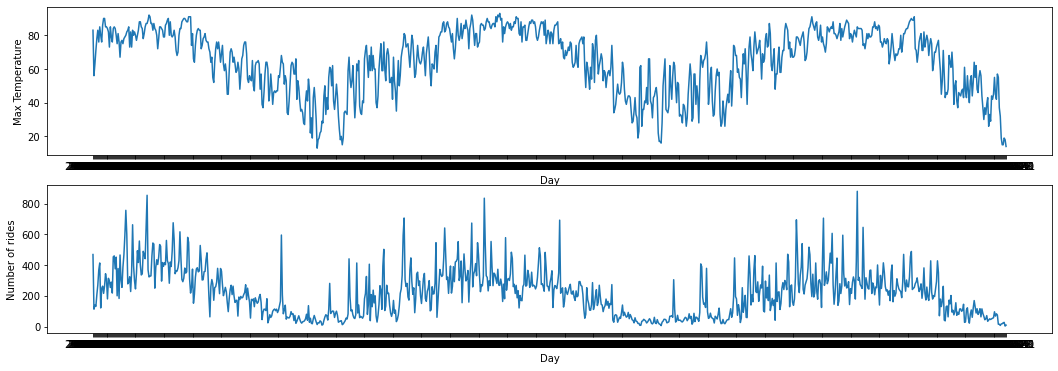

In [13]:
#Visualize temperature and number of rides
df_temp_rides = df.set_index ('Date') [['Max Temp','n_rides']]
fig, axs = plt.subplots (2, 1, figsize = (18, 6))
plot_temp = axs[0]
plot_rides = axs[1]
plot_temp.set_xlabel('Day')
plot_temp.set_ylabel('Max Temperature')
plot_temp.plot(df_temp_rides['Max Temp'])
plot_rides.set_xlabel('Day')
plot_rides.set_ylabel('Number of rides')
plot_rides.plot(df_temp_rides['n_rides'])
plt.show()

In [15]:
#Grid search with a gradient boosting regressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
x = pd.get_dummies(df, columns=['Month'], drop_first=True).drop(['Date', 'n_rides'], axis='columns')
y = df['n_rides']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

In [20]:
model = make_pipeline(MinMaxScaler(), GradientBoostingRegressor())
params = {'gradientboostingregressor__max_depth': range(3, 20)}
grid = GridSearchCV(model, params, cv=5)

grid.fit(x_train, y_train)

grid.best_estimator_.score(x_valid, y_valid)

0.6229711140187005

In [21]:
grid.best_params_

{'gradientboostingregressor__max_depth': 4}

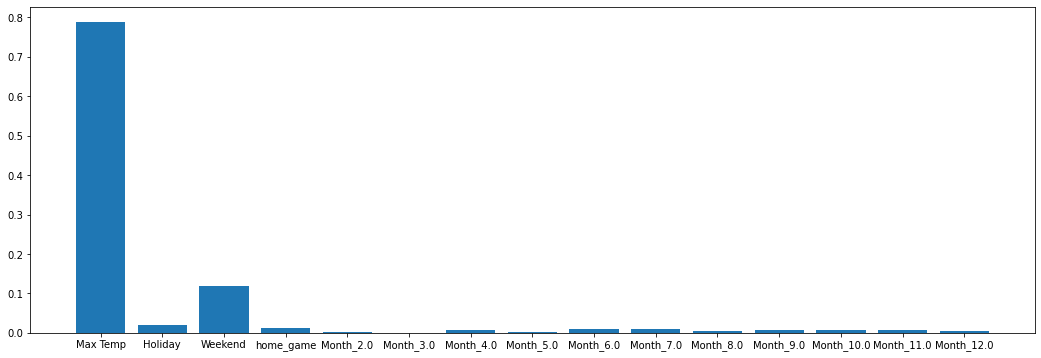

In [23]:
#Visualize the feature importances
variances = grid.best_estimator_.named_steps['gradientboostingregressor'].feature_importances_
series = pd.Series(variances, index=x.columns, name='Explained Variances')
plt.figure(figsize=(18,6))
plt.bar(series.index,series)
plt.show()